In [283]:
import dicom
import os
import numpy
import csv
from matplotlib import pyplot, cm
import pydicom
import glob

### Select Subject and series name

In [294]:
subject_name = 'ProstateX-0000'
series_name = 't2-tse-cor'
short_series_name = series_name.replace('-','')

### Create a list of dicom file sorted by slice location

In [298]:
PathDicom_find = glob.glob('/Users/catalinabustamante/Documents/proyectos/prostata/' + subject_name + '/*/*'+ short_series_name + '*/')
PathDicom = PathDicom_find[0]
FilesDCM = []  # create an empty list
for rt, dr, fl in os.walk(PathDicom):
            FilesDCM.extend(fl)
            break
dicomfiles = [f for f in FilesDCM if f[-4:] == '.dcm']

slices = [(f, dicom.read_file(os.path.join(PathDicom, f)))
              for f in dicomfiles]

slices.sort(key=lambda x: x[1].SliceLocation)

lstFilesDCM =  [os.path.join(PathDicom, x[0]) for x in slices]


In [300]:
label_path = "/Users/catalinabustamante/Documents/proyectos/prostata/ProstateX-TrainingLesionInformationv/ProstateX-Images-Train.csv"
read_label = csv.reader(label_path)
finding_path = open("/Users/catalinabustamante/Documents/proyectos/prostata/ProstateX-TrainingLesionInformationv/ProstateX-Findings-Train.csv")

with open(label_path, newline='') as f:
  reader = csv.reader(f)
  for row in reader:
        if row[0] == subject_name and row[10] == series_name :
            image_row = row
            break
finding_info = row[5].split(' ')
slice_number = int(finding_info[2])


### Read dimensions and voxel size

In [301]:
# Get ref file
RefDs = dicom.read_file(lstFilesDCM[0])

# Load dimensions based on the number of rows, columns, and slices (along the Z axis)
ConstPixelDims = (int(RefDs.Rows), int(RefDs.Columns), len(lstFilesDCM))

# Load spacing values (in mm)
ConstPixelSpacing = (float(RefDs.PixelSpacing[0]), float(RefDs.PixelSpacing[1]), float(RefDs.SliceThickness))
print(ConstPixelDims)

(320, 320, 15)


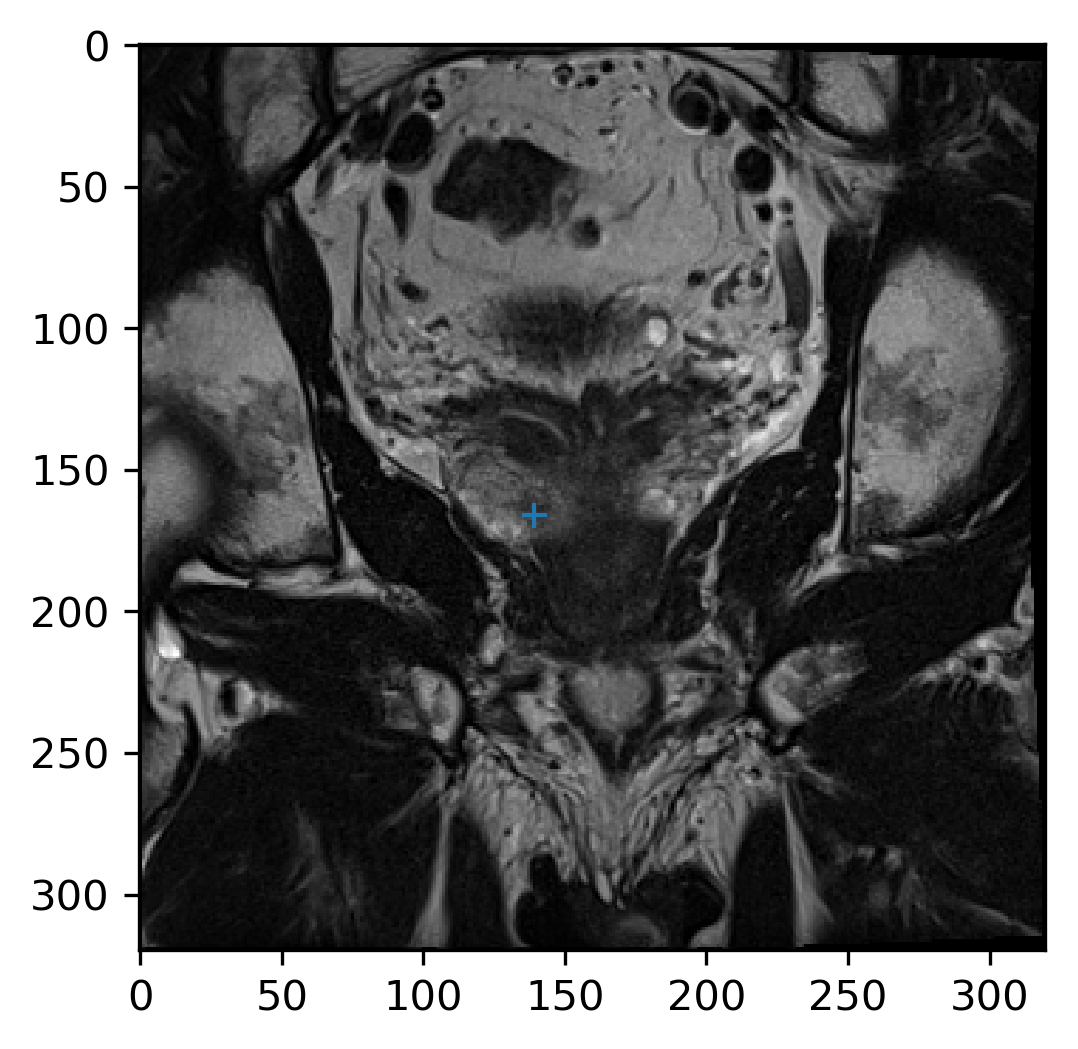

In [273]:
ds = pydicom.dcmread(lstFilesDCM[slice_number])
pyplot.figure(dpi=300)
pyplot.imshow(ds.pixel_array)
pyplot.plot(finding_info[0],finding_info[1],'+')
pyplot.show()